In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Final Project /Final-Project/Resource/IMDb_movies.csv", low_memory=False)

In [4]:
movies_cols = ["imdb_title_id","title", "year", "country", "actors", "usa_gross_income", "worlwide_gross_income"]
df_movies = df[movies_cols].copy()
print("Shape: " + str(df_movies.shape))
df_movies.head()

Shape: (85855, 7)


,imdb_title_id,title,year,country,actors,usa_gross_income,worlwide_gross_income
0,tt0000009,Miss Jerry,1894,USA,"Blanche Bayliss, William Courtenay, Chauncey D...",NaN,NaN
1,tt0000574,The Story of the Kelly Gang,1906,Australia,"Elizabeth Tait, John Tait, Norman Campbell, Be...",NaN,NaN
2,tt0001892,Den sorte drøm,1911,"Germany, Denmark","Asta Nielsen, Valdemar Psilander, Gunnar Helse...",NaN,NaN
3,tt0002101,Cleopatra,1912,USA,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",NaN,NaN
4,tt0002130,L'Inferno,1911,Italy,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",NaN,NaN


In [5]:
df_movies.dropna(inplace = True)
print("Shape: " + str(df_movies.shape))
df_movies.head()

Shape: (14160, 7)


,imdb_title_id,title,year,country,actors,usa_gross_income,worlwide_gross_income
165,tt0010323,Il gabinetto del dottor Caligari,1920,Germany,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",$ 8811,$ 8811
245,tt0012190,I quattro cavalieri dell'Apocalisse,1921,USA,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",$ 9183673,$ 9183673
254,tt0012397,Little Lord Fauntleroy,1921,USA,"Mary Pickford, Claude Gillingwater, Joseph J. ...",$ 900000,$ 1108882
258,tt0012494,Destino,1921,Germany,"Bernhard Goetzke, Lil Dagover, Walter Janssen,...",$ 12156,$ 12156
401,tt0015648,La corazzata Potemkin,1925,Soviet Union,"Aleksandr Antonov, Vladimir Barskiy, Grigoriy ...",$ 51198,$ 61389


In [6]:
df_movies['actors2'] = df_movies['actors'].str.split(",")
df_movies

,imdb_title_id,title,year,country,actors,usa_gross_income,worlwide_gross_income,actors2
165,tt0010323,Il gabinetto del dottor Caligari,1920,Germany,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",$ 8811,$ 8811,"[Werner Krauss, Conrad Veidt, Friedrich Fehe..."
245,tt0012190,I quattro cavalieri dell'Apocalisse,1921,USA,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",$ 9183673,$ 9183673,"[Pomeroy Cannon, Josef Swickard, Bridgetta C..."
254,tt0012397,Little Lord Fauntleroy,1921,USA,"Mary Pickford, Claude Gillingwater, Joseph J. ...",$ 900000,$ 1108882,"[Mary Pickford, Claude Gillingwater, Joseph ..."
258,tt0012494,Destino,1921,Germany,"Bernhard Goetzke, Lil Dagover, Walter Janssen,...",$ 12156,$ 12156,"[Bernhard Goetzke, Lil Dagover, Walter Janss..."
401,tt0015648,La corazzata Potemkin,1925,Soviet Union,"Aleksandr Antonov, Vladimir Barskiy, Grigoriy ...",$ 51198,$ 61389,"[Aleksandr Antonov, Vladimir Barskiy, Grigor..."
...,...,...,...,...,...,...,...,...
85740,tt9779516,Cosa mi lasci di te,2020,USA,"K.J. Apa, Britt Robertson, Nathan Parsons, Gar...",$ 9868521,$ 13681524,"[K.J. Apa, Britt Robertson, Nathan Parsons, ..."
85788,tt9825006,Avant qu'on explose,2019,Canada,"Étienne Galloy, Amadou Madani Tall, William Mo...",$ 119894,$ 119894,"[Étienne Galloy, Amadou Madani Tall, William..."
85801,tt9844368,Out of Liberty,2019,USA,"Cate Allen, Corbin Allred, Larry Bagby, Casey ...",$ 265279,$ 265279,"[Cate Allen, Corbin Allred, Larry Bagby, Ca..."
85803,tt9845398,Fin de siglo,2019,Argentina,"Juan Barberini, Ramon Pujol, Mía Maestro, Mari...",$ 66309,$ 79607,"[Juan Barberini, Ramon Pujol, Mía Maestro, ..."


In [7]:
# Actors_df = df_movies['actors'].str.split(",", expand = True)
# Actors_df

In [8]:
# Actors_df['world_gross_income'] = df_movies['worlwide_gross_income']
# Actors_df

In [9]:
df_movies["worlwide_gross_income"] = df_movies["worlwide_gross_income"].replace('[\$,]', '', regex=True)
df_movies["worlwide_gross_income"] = df_movies["worlwide_gross_income"].replace('[A-Z]+', '', regex=True)
df_movies.head()

,imdb_title_id,title,year,country,actors,usa_gross_income,worlwide_gross_income,actors2
165,tt0010323,Il gabinetto del dottor Caligari,1920,Germany,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",$ 8811,8811,"[Werner Krauss, Conrad Veidt, Friedrich Fehe..."
245,tt0012190,I quattro cavalieri dell'Apocalisse,1921,USA,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",$ 9183673,9183673,"[Pomeroy Cannon, Josef Swickard, Bridgetta C..."
254,tt0012397,Little Lord Fauntleroy,1921,USA,"Mary Pickford, Claude Gillingwater, Joseph J. ...",$ 900000,1108882,"[Mary Pickford, Claude Gillingwater, Joseph ..."
258,tt0012494,Destino,1921,Germany,"Bernhard Goetzke, Lil Dagover, Walter Janssen,...",$ 12156,12156,"[Bernhard Goetzke, Lil Dagover, Walter Janss..."
401,tt0015648,La corazzata Potemkin,1925,Soviet Union,"Aleksandr Antonov, Vladimir Barskiy, Grigoriy ...",$ 51198,61389,"[Aleksandr Antonov, Vladimir Barskiy, Grigor..."


In [10]:
df_movies['year'] = df_movies['year'].astype(int)

In [11]:
df_movies = df_movies[(df_movies['year'] >= 1950) & (df_movies['year'] <=2001)]

In [12]:
WordWide_Actors_df = df_movies[["imdb_title_id","worlwide_gross_income", "actors2"]]
WordWide_Actors_df

,imdb_title_id,worlwide_gross_income,actors2
4334,tt0035423,76019048,"[Meg Ryan, Hugh Jackman, Liev Schreiber, Br..."
6386,tt0042192,150438,"[Bette Davis, Anne Baxter, George Sanders, ..."
6441,tt0042332,95126535,"[Ilene Woods, Eleanor Audley, Verna Felton, ..."
6530,tt0042619,47000,"[Claude Laydu, Jean Riveyre, Adrien Borel, ..."
6567,tt0042735,4848320,"[Greer Garson, Walter Pidgeon, John Hodiak, ..."
...,...,...,...
41269,tt0304704,111287,"[Eiji Okuda, Mayu Ozawa, Akira Shoji, Mari ..."
41277,tt0304790,1714,"[Karim Tarek, Riyad Echahi, Sihem Benamoune,..."
41378,tt0307109,143121,"[Fay Masterson, Andrew Parks, Susan McConnel..."
41519,tt0310149,77567,"[Hideaki Itô, Yumiko Shaku, Shirô Sano, Yôi..."


In [13]:
WA = WordWide_Actors_df.explode('actors2')
WA = WA.sample(frac=.10)
WA

,imdb_title_id,worlwide_gross_income,actors2
17056,tt0073155,19120,Klaus Kinski
28322,tt0110729,1608570,Temuera Morrison
26003,tt0102138,205405498,Cheryl Penland
24137,tt0095832,169785,Anthony Geary
37738,tt0240122,1125058,David Cangelosi
...,...,...,...
28840,tt0112854,1176982,Richard Edson
32650,tt0139668,16649768,Hattie Winston
27629,tt0108052,322287794,Norbert Weisser
27386,tt0107225,1113435,Maria Esposito


In [14]:
# WA.loc[WA['actors2']=='Emma Watson']

In [15]:
Actor_list = WA['actors2'].unique()

In [16]:
Actor_list.shape

(7158,)

In [17]:
# X = WA['actors2']
X = WA['worlwide_gross_income']

In [18]:
 from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(Actor_list)
encoded_y = label_encoder.transform(Actor_list)

In [19]:
for label, original_class in zip(encoded_y, Actor_list):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Streaming output truncated to the last 5000 lines.
Encoded Label: 1702
------------
Original Class:  Andrea Baker
Encoded Label: 212
------------
Original Class:  Dan Martin
Encoded Label: 1288
------------
Original Class:  Sergio Bini Bustric
Encoded Label: 5761
------------
Original Class:  Aria Noelle Curzon
Encoded Label: 385
------------
Original Class: Irène Jacob
Encoded Label: 6843
------------
Original Class:  Pascal Mazzotti
Encoded Label: 4845
------------
Original Class:  Ama Ashe Dongtse
Encoded Label: 177
------------
Original Class:  Hugo Pratt
Encoded Label: 2477
------------
Original Class:  Bijaya Jena
Encoded Label: 570
------------
Original Class:  Yvette Heyden
Encoded Label: 6652
------------
Original Class:  Toni Collette
Encoded Label: 6273
------------
Original Class:  Harsh Nayyar
Encoded Label: 2366
------------
Original Class:  Randy Brooks
Encoded Label: 5174
------------
Original Class:  Kevin Bishop
Encoded Label: 3527
------------
Original Class:  Véroni

In [20]:
 from tensorflow.keras.utils import to_categorical

# # Step 2: One-hot encoding
# one_hot_y = to_categorical(encoded_y)
# one_hot_y

In [21]:
y_labels = label_encoder.transform(WA['actors2'])

In [22]:
y_labels.shape

(8416,)

In [23]:
WA.shape

(8416, 3)

In [24]:
y_labels[0]

3609

In [25]:
WA['actors2']

17056         Klaus Kinski
28322     Temuera Morrison
26003       Cheryl Penland
24137        Anthony Geary
37738      David Cangelosi
               ...        
28840        Richard Edson
32650       Hattie Winston
27629      Norbert Weisser
27386       Maria Esposito
26930           Pip Mushin
Name: actors2, Length: 8416, dtype: object

In [26]:
from tensorflow.keras.utils import to_categorical
y_one_hot = to_categorical(y_labels)

In [27]:
y_one_hot.shape

(8416, 7158)

In [28]:
WA

,imdb_title_id,worlwide_gross_income,actors2
17056,tt0073155,19120,Klaus Kinski
28322,tt0110729,1608570,Temuera Morrison
26003,tt0102138,205405498,Cheryl Penland
24137,tt0095832,169785,Anthony Geary
37738,tt0240122,1125058,David Cangelosi
...,...,...,...
28840,tt0112854,1176982,Richard Edson
32650,tt0139668,16649768,Hattie Winston
27629,tt0108052,322287794,Norbert Weisser
27386,tt0107225,1113435,Maria Esposito


In [29]:
X = y_one_hot 
y = WA['worlwide_gross_income']

In [30]:
y = y.astype(np.int)

In [31]:
y

17056        19120
28322      1608570
26003    205405498
24137       169785
37738      1125058
           ...    
28840      1176982
32650     16649768
27629    322287794
27386      1113435
26930     11738022
Name: worlwide_gross_income, Length: 8416, dtype: int64

In [32]:
X.shape

(8416, 7158)

In [33]:
# .to_numpy().reshape(-1,1)

In [34]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
#  from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data

# ### BEGIN SOLUTION
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)
# ### END SOLUTION

In [36]:
# # Transform the training and testing data using the X_scaler and y_scaler models

# ### BEGIN SOLUTION
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)
# ### END SOLUTION

In [37]:
#  # Create a LinearRegression model and fit it to the scaled training data

# ### BEGIN SOLUTION
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train, y_train)
# ### END SOLUTION

In [38]:
# # Make predictions using a fitted model
# # Plot the difference between the model predicted values and actual y values, versus the model predicted values
# # Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

# ### BEGIN SOLUTION
# predictions = model.predict(X_test_scaled)
# predictions2 = model.predict(X_train_scaled)
# # model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(predictions2, predictions2 - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(predictions, predictions - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.show()
# ### END SOLUTION

In [39]:
#  # Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

# ### BEGIN SOLUTION
# from sklearn.metrics import mean_squared_error

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)
# ### END SOLUTION

# print(f"MSE: {MSE}, R2: {r2}")

In [40]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(max_iter=500, verbose=1) # we need to use more than 100 iterations (the default)
# classifier

In [41]:
# classifier.fit(X_train, y_train)

In [42]:
#  print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [43]:
#  predictions = classifier.predict(X_test)
# print(f"First 10 Predictions:   {predictions[:10]}")
# print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [44]:
# df = pd.DataFrame(predictions)

# df.median()

In [45]:
#  pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [46]:
# import numpy as np
# import seaborn as sns
# sns.set_theme(style="whitegrid")

# # Make an example dataset with y ~ x
# # rs = np.random.RandomState(7)
# predictions2 = classifier.predict(X_train)
# # predictions = classifier.predict(X_test)
# x = y_train
# y = predictions2

# # Plot the residuals after fitting a linear model
# sns.residplot(x=x, y=y, lowess=True, color="g")

In [47]:
# # Make predictions using a fitted model
# # Plot the difference between the model predicted values and actual y values, versus the model predicted values
# # Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

# ### BEGIN SOLUTION
# # predictions = classifier.predict(X_test)
# predictions2 = classifier.predict(X_train)
# # model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(predictions2 - y_train, predictions2, c="blue", label="Training Data")
# plt.scatter(predictions - y_test, predictions, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
# plt.title("Residual Plot")
# plt.show()
# ### END SOLUTION

In [48]:
# y_train

In [49]:
# predictions2

In [50]:
# #Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

# ### BEGIN SOLUTION
# from sklearn.metrics import mean_squared_error

# MSE = mean_squared_error(y_test, predictions)
# r2 = classifier.score(X_test, y_test)
# ### END SOLUTION

# print(f"MSE: {MSE}, R2: {r2}")

In [52]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: -0.101


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


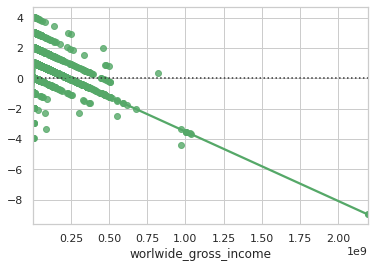

In [58]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
# rs = np.random.RandomState(7)
predictions2 = model.predict(X_train)
# predictions = classifier.predict(X_test)
x = y_train
y = predictions2

# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color="g")

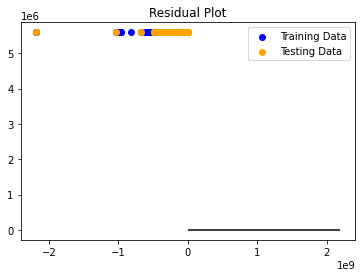

In [56]:
### BEGIN SOLUTION
predictions = model.predict(X_test)
predictions2 = model.predict(X_train)
# model.fit(X_train_scaled, y_train_scaled)
plt.scatter(predictions2 - y_train, predictions2, c="blue", label="Training Data")
plt.scatter(predictions - y_test, predictions, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [55]:
# Calculate regression report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

ValueError: ignored

In [ ]:
# np.zeros(len(actor_list), dtype=np.float

In [ ]:
# np.argmax(one_hot_y[1])

In [ ]:
# X.shape

In [ ]:
# one_hot_y.shape

In [ ]:
# Actor_list[0]
# Index = label_encoder.transform([Actor_list[0]])[0]

In [ ]:
# one_hot_y[Index]

In [ ]:
# np.argmax(one_hot_y[0])

In [ ]:
# label_encoder.inverse_transform([41773])

In [ ]:
# one_hot_actor = np.argmax(one_hot_y)

In [ ]:
# label_encoder.inverse_transform()

In [ ]:
# Actor_list_one_hot_df = pd.DataFrame({ "Actor List": Actor_list, 
# "One Hot Y": one_hot_y})
# Actor_list_one_hot_y

In [ ]:
# Use train_test_split to create training and testing data
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, random_state=1)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data
# X_scaler = StandardScaler().fit(X_train)

In [ ]:
# Transform the training and testing data using the X_scaler

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [ ]:
#  from tensorflow.keras.utils import to_categorical

# # Step 2: One-hot encoding
# one_hot_y = to_categorical(encoded_y)
# one_hot_y

In [ ]:
# WA.unstack(level = 0)

In [ ]:
# from pprint import pprint
# from collections import defaultdict
# actor_gross = defaultdict()
# for index,row in df_movies.explode():
#     actors=row["actors2"]
#     for actor in actors:
#         actor = actor.replace(" ", "")
#         if actor in actor_gross:
#             actor_gross[actor].append(row["worlwide_gross_income"])
#         else: 
#              actor_gross[actor] = list(row["worlwide_gross_income"])
# pprint(actor_gross)